# load the dataset
link : https://www.kaggle.com/datasets/gti-upm/leapgestrecog/data


In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"buthainaesam","key":"68121046cccc27434a343de6f72c70e7"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.13G/2.13G [00:26<00:00, 59.1MB/s]
100% 2.13G/2.13G [00:26<00:00, 85.0MB/s]


In [7]:
!unzip leapgestrecog.zip


Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import cv2
import glob as gb

import tensorflow as tf
import keras

In [9]:
path='/content/leapGestRecog'

# check the size of the images

In [10]:
size=[]
for folder in os.listdir(path):
    subfolder_path = os.path.join(path, folder)  # Path to the subfolder
    if os.path.isdir(subfolder_path):  # Ensure it's a directory
        for subfolder in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, subfolder)
            images = gb.glob(pathname=image_path + '/*.png')

            for img in images:
                image = plt.imread(img)
                size.append(image.shape)

In [11]:
pd.Series(size).value_counts()

,count
"(240, 640)",20000


In [12]:
import os
import shutil
from sklearn.model_selection import train_test_split


#split the data to train and tes and val

In [13]:
# Original dataset path
dataset_path = '/content/leapGestRecog'

# Paths for train, val, test datasets
base_dir = '/content/split_dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create directories for train, val, test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [14]:
# Loop through the 10 main folders (00, 01, ..., 09)
for main_folder in os.listdir(dataset_path):
    main_folder_path = os.path.join(dataset_path, main_folder)

    # Loop through each label folder (e.g., 'palm', 'fist') inside the main folder
    for label_folder in os.listdir(main_folder_path):
        label_path = os.path.join(main_folder_path, label_folder)

        # Collect all images for this label
        images = [os.path.join(label_path, img) for img in os.listdir(label_path)]

        # Split into train, val, test
        train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

        # Create label subdirectories in train, val, test folders
        os.makedirs(os.path.join(train_dir, label_folder), exist_ok=True)
        os.makedirs(os.path.join(val_dir, label_folder), exist_ok=True)
        os.makedirs(os.path.join(test_dir, label_folder), exist_ok=True)

        # Move images to respective directories
        for img in train_images:
            shutil.copy(img, os.path.join(train_dir, label_folder))
        for img in val_images:
            shutil.copy(img, os.path.join(val_dir, label_folder))
        for img in test_images:
            shutil.copy(img, os.path.join(test_dir, label_folder))

#resizing to 224x224

In [15]:
from tqdm import tqdm


In [16]:
# Paths to train, validation, and test directories
base_dir = '/content/split_dataset'
resize_dim = (224, 224)  # Resize dimensions

# Function to resize images in-place
def resize_images_in_place(base_dir):
    for split in ['train', 'val', 'test']:  # Iterate over train, val, and test folders
        split_path = os.path.join(base_dir, split)

        for class_folder in tqdm(os.listdir(split_path), desc=f"Processing {split} folder"):
            class_folder_path = os.path.join(split_path, class_folder)

            for img_file in os.listdir(class_folder_path):
                img_path = os.path.join(class_folder_path, img_file)
                img = cv2.imread(img_path)

                if img is not None:
                    # Resize the image
                    resized_img = cv2.resize(img, resize_dim)

                    # Overwrite the original file
                    cv2.imwrite(img_path, resized_img)

resize_images_in_place(base_dir)

print("All images resized in-place in the train/val/test folders.")

Processing test folder: 100%|██████████| 10/10 [00:18<00:00,  1.81s/it]

All images resized in-place in the train/val/test folders.


# normallizing the dataset based on the models

In [17]:

from tensorflow.keras.applications import resnet, densenet, xception

# Paths to the original split dataset
base_dir = '/content/split_dataset'

# Paths for normalized datasets
output_dirs = {
    "ResNet": "/content/dataset_resnet",
    "DenseNet": "/content/dataset_densenet",
    "Xception": "/content/dataset_xception"
}

# Define preprocessing functions for each model
preprocess_functions = {
    "ResNet": resnet.preprocess_input,
    "DenseNet": densenet.preprocess_input,
    "Xception": xception.preprocess_input
}

# Function to normalize and save images in a new directory
def normalize_and_save(base_dir, output_dir, preprocess_input):
    if os.path.exists(output_dir):
        shutil.rmtree(output_dir)  # Remove existing directory to start fresh
    shutil.copytree(base_dir, output_dir)  # Copy original structure

    for split in ['train', 'val', 'test']:
        split_path = os.path.join(output_dir, split)

        for class_folder in tqdm(os.listdir(split_path), desc=f"Processing {split} for {output_dir}"):
            class_folder_path = os.path.join(split_path, class_folder)

            for img_file in os.listdir(class_folder_path):
                img_path = os.path.join(class_folder_path, img_file)
                img = cv2.imread(img_path)

                if img is not None:
                    # Convert to float32 and normalize
                    img = img.astype('float32')
                    img = preprocess_input(img)

                    # Save the normalized image
                    cv2.imwrite(img_path, (img * 255).astype('uint8'))  # Scale back to [0, 255] for saving

# Normalize datasets for each model
for model, output_dir in output_dirs.items():
    print(f"Normalizing images for {model}...")
    normalize_and_save(base_dir, output_dir, preprocess_functions[model])

print("Normalization completed for all models.")


Normalizing images for ResNet...


Processing test for /content/dataset_resnet: 100%|██████████| 10/10 [00:18<00:00,  1.85s/it]


Normalizing images for DenseNet...


Processing test for /content/dataset_densenet: 100%|██████████| 10/10 [00:18<00:00,  1.86s/it]


Normalizing images for Xception...


Processing test for /content/dataset_xception: 100%|██████████| 10/10 [00:16<00:00,  1.64s/it]

Normalization completed for all models.


# data augmentation

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=40,      # Random rotation within 40 degrees
    shear_range=0.2,        # Random shear transformation
    zoom_range=0.2,         # Random zoom in or out
    horizontal_flip=True,   # Random horizontal flip (mirror)
    fill_mode='nearest'     # Fill pixels after transformation with nearest pixel value
)

# Apply the generator on your training data directory
train_generator_resnet = datagen.flow_from_directory(
    '/content/dataset_resnet/train',  # Path to training dataset
    target_size=(224, 224),  # Keep the size as 224x224
    batch_size=32,           # Number of images to process in one batch
    class_mode='categorical' # For multi-class classification
)


Found 14000 images belonging to 10 classes.


In [19]:
train_generator_densenet = datagen.flow_from_directory(
    '/content/dataset_densenet/train',  # Path to training dataset
    target_size=(224, 224),  # Keep the size as 224x224
    batch_size=32,           # Number of images to process in one batch
    class_mode='categorical' # For multi-class classification
)


Found 14000 images belonging to 10 classes.


In [ ]:
train_generator_xception = datagen.flow_from_directory(
    '/content/dataset_xception/train',  # Path to training dataset
    target_size=(224, 224),  # Keep the size as 224x224
    batch_size=32,           # Number of images to process in one batch
    class_mode='categorical' # For multi-class classification
)


Found 14000 images belonging to 10 classes.


# Resnet-34

In [ ]:
val_datagen = ImageDataGenerator()

In [ ]:
validation_generator_resnet = val_datagen.flow_from_directory(
    '/content/dataset_resnet/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

Found 3000 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a function to create a basic block (Bottleneck block for ResNet)
def basic_block(x, filters, stride=1):
    # First convolution layer
    shortcut = x  # for the skip connection
    x = layers.Conv2D(filters, kernel_size=3, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second convolution layer
    x = layers.Conv2D(filters, kernel_size=3, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Add the shortcut connection (skip connection) if the stride is 1, or adjust the shape if stride is 2
    if stride == 1:
        x = layers.Add()([x, shortcut])
    else:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
        x = layers.Add()([x, shortcut])

    x = layers.ReLU()(x)
    return x

# Define the ResNet-34 model
def resnet34(input_shape=(224, 224, 3)):
    inputs = layers.Input(shape=input_shape)

    # Initial convolution and maxpool layer
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Stage 1 - 3 blocks of 64 filters
    x = basic_block(x, 64, stride=1)
    x = basic_block(x, 64, stride=1)
    x = basic_block(x, 64, stride=1)

    # Stage 2 - 4 blocks of 128 filters (stride=2 to downsample)
    x = basic_block(x, 128, stride=2)
    x = basic_block(x, 128, stride=1)
    x = basic_block(x, 128, stride=1)
    x = basic_block(x, 128, stride=1)

    # Stage 3 - 6 blocks of 256 filters (stride=2 to downsample)
    x = basic_block(x, 256, stride=2)
    x = basic_block(x, 256, stride=1)
    x = basic_block(x, 256, stride=1)
    x = basic_block(x, 256, stride=1)
    x = basic_block(x, 256, stride=1)
    x = basic_block(x, 256, stride=1)

    # Stage 4 - 3 blocks of 512 filters (stride=2 to downsample)
    x = basic_block(x, 512, stride=2)
    x = basic_block(x, 512, stride=1)
    x = basic_block(x, 512, stride=1)

    # Global Average Pooling and Fully Connected Layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(10, activation='softmax')(x)

    # Create model
    model = models.Model(inputs, x, name='ResNet34')

    return model


In [ ]:
# Build the model
model_resnet = resnet34()


In [ ]:

# Summary of the model
model_resnet.summary()


Model: "ResNet34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_36 (Conv2D)        │ (None, 112, 112, 64)   │          9,472 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_36    │ (None, 112, 112, 64)   │            256 │ conv2d_36[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_33 (ReLU)           │ (None, 112, 112, 64)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 56, 56, 64)     │              0 │ re_lu_33[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_37 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_37    │ (None, 56, 56, 64)     │            256 │ conv2d_37[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_34 (ReLU)           │ (None, 56, 56, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_38 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ re_lu_34[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_38    │ (None, 56, 56, 64)     │            256 │ conv2d_38[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_16 (Add)              │ (None, 56, 56, 64)     │              0 │ batch_normalization_3… │
│                           │                        │                │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_35 (ReLU)           │ (None, 56, 56, 64)     │              0 │ add_16[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_39 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ re_lu_35[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_39    │ (None, 56, 56, 64)     │            256 │ conv2d_39[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_36 (ReLU)           │ (None, 56, 56, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_40 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ re_lu_36[0][0]         │
├──────────────────────

 Total params: 21,315,338 (81.31 MB)

 Trainable params: 21,298,314 (81.25 MB)

 Non-trainable params: 17,024 (66.50 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam
model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#fit the model
history_resnet = model_resnet.fit(
    train_generator_resnet,
    epochs=20,
    validation_data=validation_generator_resnet,
    batch_size=32
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 305s 600ms/step - accuracy: 0.4789 - loss: 1.6010 - val_accuracy: 0.1240 - val_loss: 26.7163
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 270s 528ms/step - accuracy: 0.8965 - loss: 0.3044 - val_accuracy: 0.3017 - val_loss: 5.1743
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 263s 532ms/step - accuracy: 0.9479 - loss: 0.1561 - val_accuracy: 0.1150 - val_loss: 46.4217
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 232s 524ms/step - accuracy: 0.9735 - loss: 0.0919 - val_accuracy: 0.9613 - val_loss: 0.1022
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 263s 527ms/step - accuracy: 0.9813 - loss: 0.0635 - val_accuracy: 0.9713 - val_loss: 0.0759
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 233s 526ms/step - accuracy: 0.9781 - loss: 0.0644 - val_accuracy: 0.1000 - val_loss: 45.5769
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 261s 523ms/step - accuracy: 0.9815 - loss: 0.0576 - val_accuracy: 0.2097 - val_loss: 19.9616
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 237s 533ms/step - accuracy: 0.9773 - loss: 

In [ ]:
test_datagent = ImageDataGenerator()

In [ ]:
test_generator_resnet = test_datagent.flow_from_directory(
    '/content/dataset_resnet/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Multi-class classification
)

Found 3000 images belonging to 10 classes.


# Resnet Eavluation

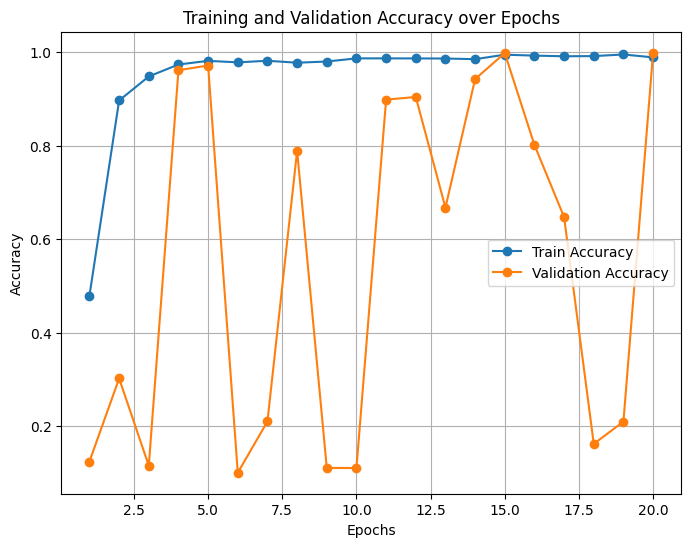

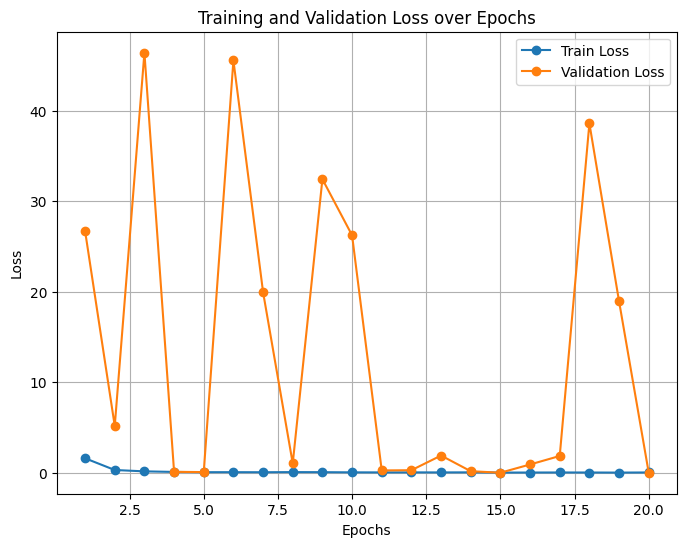

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from the training output
epochs = list(range(1, 21))
train_accuracy = [
    0.4789, 0.8965, 0.9479, 0.9735, 0.9813, 0.9781, 0.9815, 0.9773, 0.9799, 0.9866,
    0.9866, 0.9865, 0.9863, 0.9849, 0.9945, 0.9925, 0.9911, 0.9915, 0.9949, 0.9888
]
val_accuracy = [
    0.1240, 0.3017, 0.1150, 0.9613, 0.9713, 0.1000, 0.2097, 0.7890, 0.1103, 0.1100,
    0.8983, 0.9040, 0.6673, 0.9423, 0.9980, 0.8013, 0.6470, 0.1617, 0.2093, 0.9987
]
train_loss = [
    1.6010, 0.3044, 0.1561, 0.0919, 0.0635, 0.0644, 0.0576, 0.0730, 0.0651, 0.0457,
    0.0401, 0.0432, 0.0385, 0.0465, 0.0199, 0.0275, 0.0323, 0.0291, 0.0192, 0.0341
]
val_loss = [
    26.7163, 5.1743, 46.4217, 0.1022, 0.0759, 45.5769, 19.9616, 1.0326, 32.4476, 26.2432,
    0.2573, 0.2818, 1.9041, 0.1721, 0.0048, 0.9161, 1.8549, 38.6078, 18.9510, 0.0054
]

# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label="Train Accuracy", marker='o')
plt.plot(epochs, val_accuracy, label="Validation Accuracy", marker='o')
plt.title("Training and Validation Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label="Train Loss", marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", marker='o')
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
import seaborn as sns

# Predict probabilities and classes
y_pred_probs_resnet = model_resnet.predict(test_generator_resnet)  # Predicted probabilities
y_pred_classes_resnet = np.argmax(y_pred_probs_resnet, axis=1)  # Predicted class indices
y_true_resnet = test_generator_resnet.classes  # True labels from the test generator

# Calculate accuracy test
accuracy = accuracy_score(y_true_resnet, y_pred_classes_resnet)

# Classification report (Precision, Recall, F1-score)
class_labels = list(test_generator_resnet.class_indices.keys())
report = classification_report(y_true_resnet, y_pred_classes_resnet, target_names=class_labels)

# Print metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)




/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step
Accuracy: 0.10933333333333334
Classification Report:
                precision    recall  f1-score   support

      01_palm       0.10      0.10      0.10       300
         02_l       0.11      0.11      0.11       300
      03_fist       0.09      0.09      0.09       300
04_fist_moved       0.12      0.12      0.12       300
     05_thumb       0.10      0.10      0.10       300
     06_index       0.11      0.11      0.11       300
        07_ok       0.14      0.14      0.14       300
08_palm_moved       0.13      0.13      0.13       300
         09_c       0.09      0.09      0.09       300
      10_down       0.11      0.11      0.11       300

     accuracy                           0.11      3000
    macro avg       0.11      0.11      0.11      3000
 weighted avg       0.11      0.11      0.11      3000



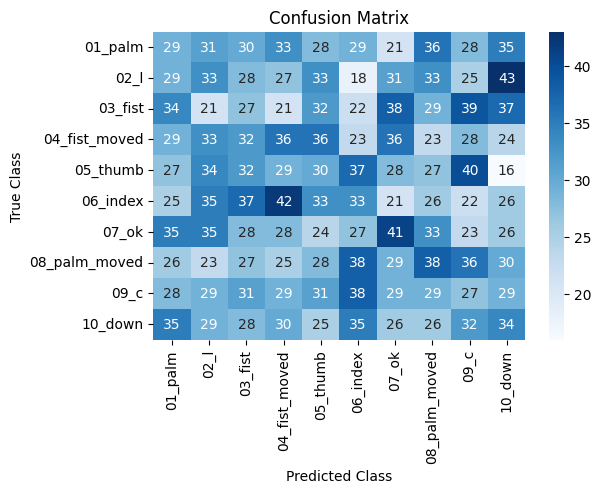

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_true_resnet, y_pred_classes_resnet)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


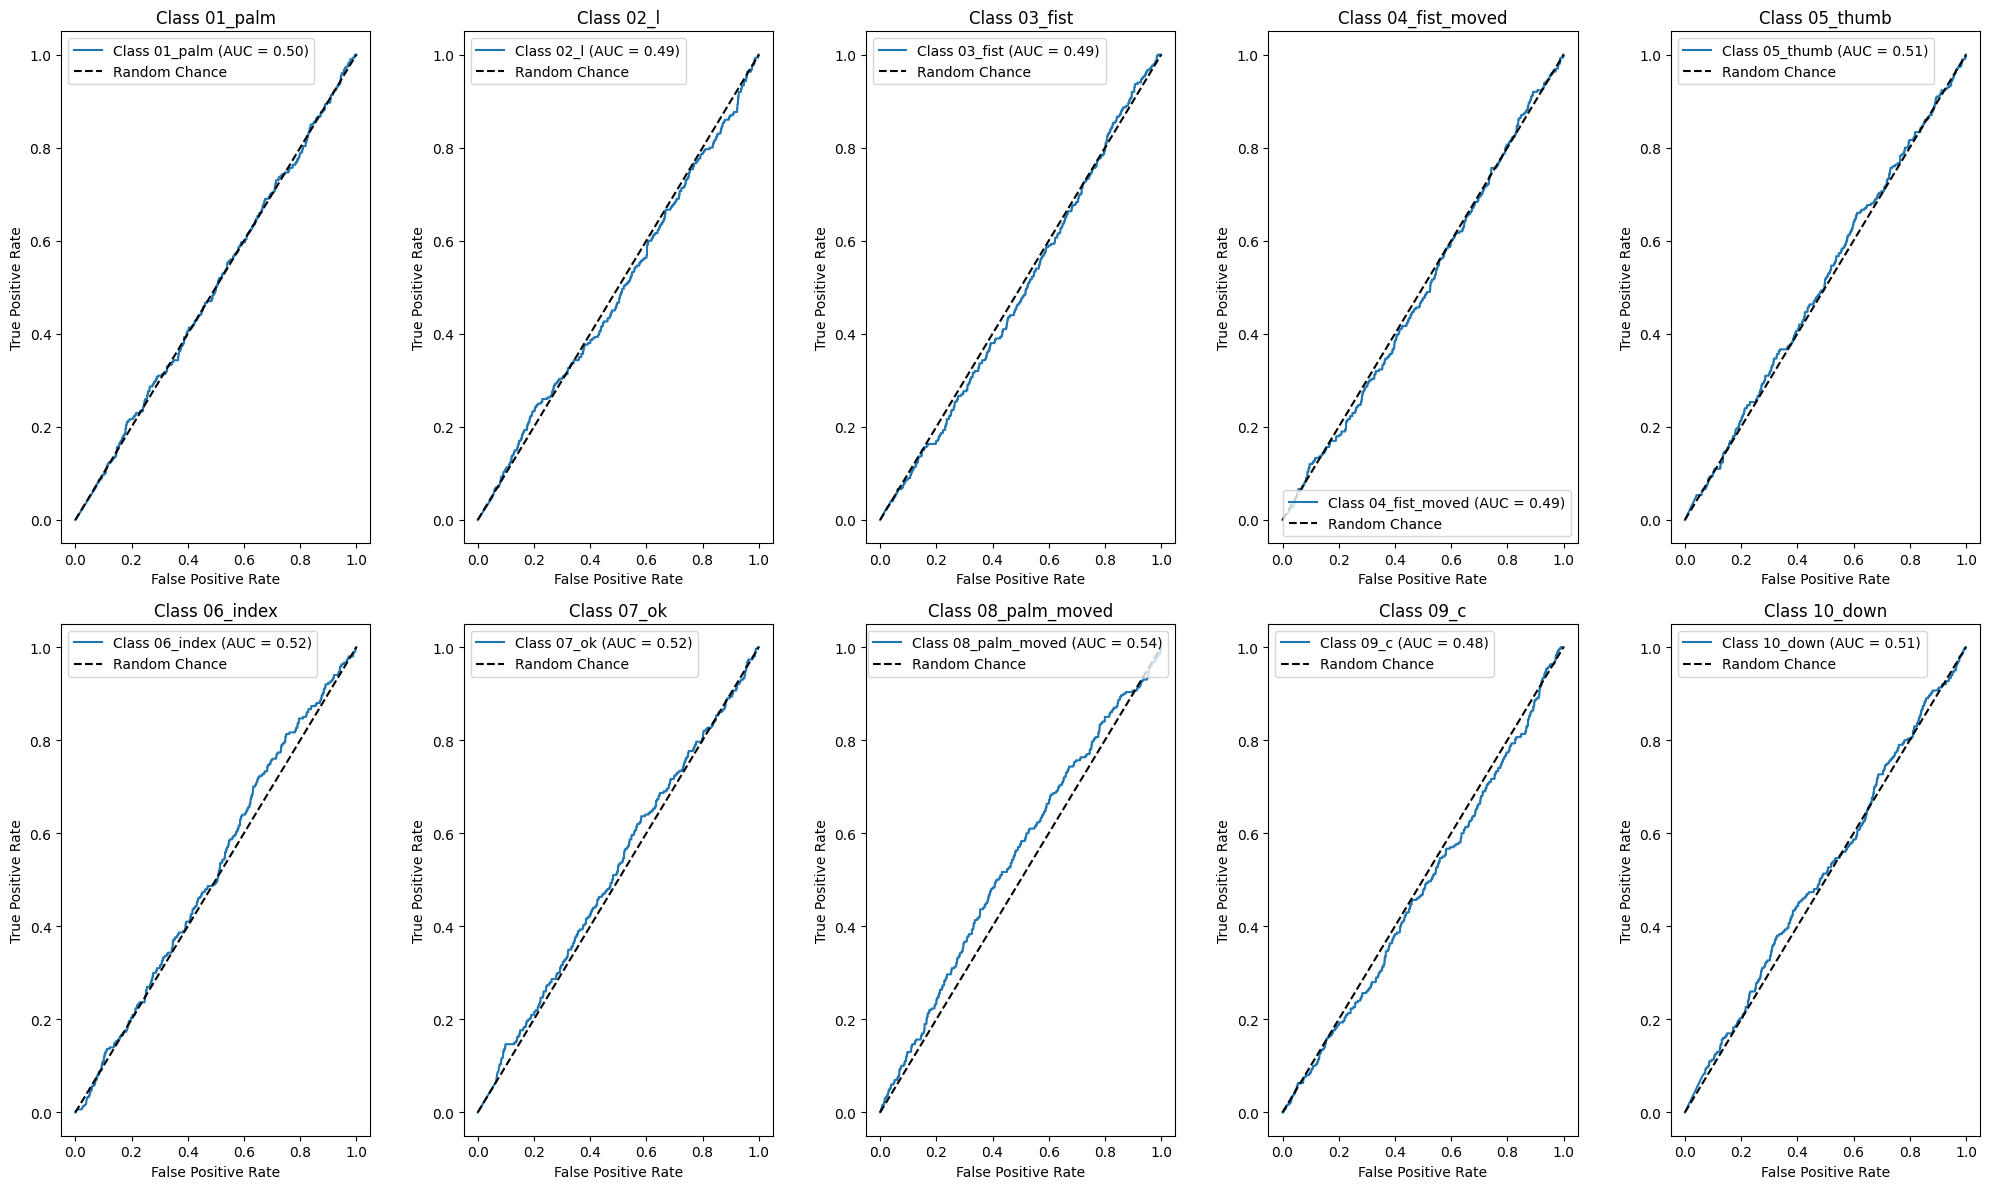

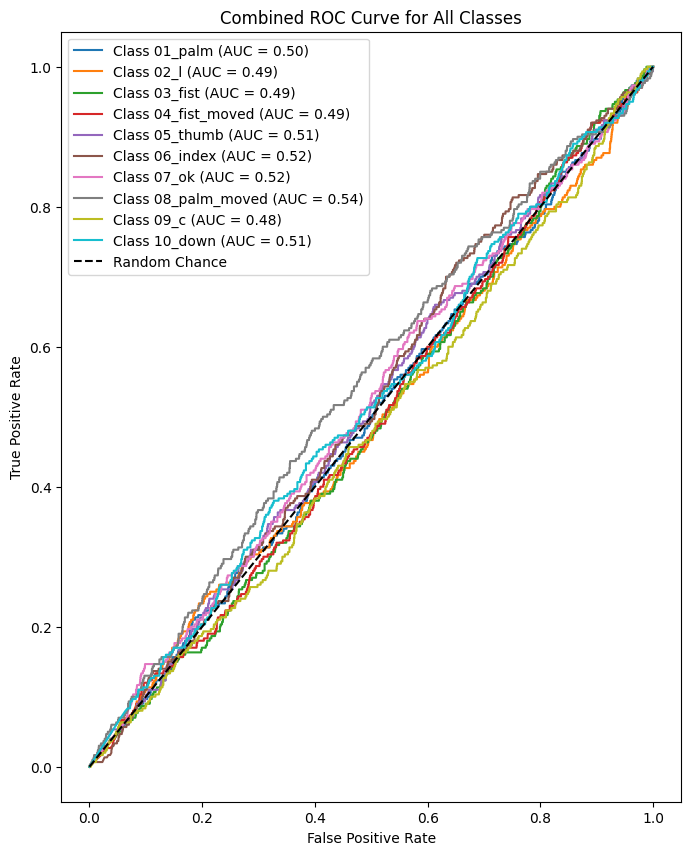

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

n_classes = len(class_labels)
fpr = {}
tpr = {}
roc_auc = {}

# Calculate ROC and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_resnet == i, y_pred_probs_resnet[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves for each class
fig, axes = plt.subplots(nrows=(n_classes // 5) + (n_classes % 5 > 0), ncols=5, figsize=(20, 4 * (n_classes // 5 + 1)))

# Flatten axes to easily loop over them
axes = axes.flatten()

# Plot each class's ROC curve
for i in range(n_classes):
    axes[i].plot(fpr[i], tpr[i], label=f"Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})")
    axes[i].plot([0, 1], [0, 1], "k--", label="Random Chance")
    axes[i].set_title(f"Class {class_labels[i]}")
    axes[i].set_xlabel("False Positive Rate")
    axes[i].set_ylabel("True Positive Rate")
    axes[i].legend(loc="best")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Plot the combined ROC Curve for all classes
plt.figure(figsize=(8, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.title("Combined ROC Curve for All Classes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()


# xception

In [ ]:
val_datagen = ImageDataGenerator()

# Create validation generator
val_generator_xception = val_datagen.flow_from_directory(
    '/content/dataset_xception/val',  # Path to validation dataset
    target_size=(224, 224),  # Keep the size as 224x224
    batch_size=32,           # You can adjust the batch size if needed
    class_mode='categorical'  # For multi-class classification
)

Found 3000 images belonging to 10 classes.


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# Define the paths
base_path = "/content/dataset_xception"
subfolders = ['train', 'test', 'val']  # Subfolders for splits

# Function to process images
def process_images_to_rgb(folder_path):
    # Get all image file paths
    for root, dirs, files in os.walk(folder_path):
        for file in tqdm(files):
            if file.endswith(('png')):
                file_path = os.path.join(root, file)

                # Load grayscale image
                gray_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

                # Convert to RGB (3 channels)
                rgb_image = cv2.merge([gray_image, gray_image, gray_image])

                # Save back to the same path
                cv2.imwrite(file_path, rgb_image)

# Process each subfolder
for subfolder in subfolders:
    folder_path = os.path.join(base_path, subfolder)
    print(f"Processing {subfolder} images...")
    process_images_to_rgb(folder_path)

print("All images have been converted to 3 channels (RGB).")


Processing train images...


0it [00:00, ?it/s]
100%|██████████| 1400/1400 [00:05<00:00, 273.85it/s]


Processing test images...


0it [00:00, ?it/s]
100%|██████████| 300/300 [00:01<00:00, 277.48it/s]


Processing val images...


0it [00:00, ?it/s]
100%|██████████| 300/300 [00:01<00:00, 274.59it/s]

All images have been converted to 3 channels (RGB).


In [ ]:
base_model = xception.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [ ]:
model_xception = models.Sequential([
    base_model,  # Pretrained base
    layers.GlobalAveragePooling2D(),  # Pooling layer
    layers.Dense(256, activation='relu'),  # Dense layer
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer
])


In [ ]:
model_xception.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model_xception.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,388,594 (81.59 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model_xception.fit(
    train_generator_xception,
    validation_data=val_generator_xception,
    epochs=15,
    callbacks=[early_stopping]
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 258s 543ms/step - accuracy: 0.2640 - loss: 2.6117 - val_accuracy: 0.5533 - val_loss: 1.2735
Epoch 2/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 235s 508ms/step - accuracy: 0.4521 - loss: 1.5259 - val_accuracy: 0.6123 - val_loss: 1.1393
Epoch 3/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 226s 509ms/step - accuracy: 0.5166 - loss: 1.3348 - val_accuracy: 0.6803 - val_loss: 0.9800
Epoch 4/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 225s 507ms/step - accuracy: 0.5653 - loss: 1.1971 - val_accuracy: 0.6917 - val_loss: 0.8881
Epoch 5/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 236s 532ms/step - accuracy: 0.5937 - loss: 1.1253 - val_accuracy: 0.7250 - val_loss: 0.7863
Epoch 6/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 227s 508ms/step - accuracy: 0.6214 - loss: 1.0367 - val_accuracy: 0.7170 - val_loss: 0.7679
Epoch 7/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 273s 537ms/step - accuracy: 0.6306 - loss: 1.0281 - val_accuracy: 0.7483 - val_loss: 0.7168
Epoch 8/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 255s 521ms/step - accuracy: 0.6507 - loss: 0.96

# Xception Evaluation

In [ ]:
val_loss, val_accuracy = model_xception.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.8414 - loss: 0.5026
Validation Loss: 0.5229
Validation Accuracy: 83.50%


In [ ]:
test_datagen = ImageDataGenerator()
test_generator_xception = test_datagen.flow_from_directory(
    '/content/dataset_xception/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model_xception.evaluate(test_generator_xception)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 3000 images belonging to 10 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.7963 - loss: 0.5780
Test Loss: 0.5646
Test Accuracy: 80.90%


In [ ]:
# Get predictions
predictions = model_xception.predict(test_generator_xception)

# Convert predictions to class labels
predicted_classes = predictions.argmax(axis=-1)

# True labels
true_classes = test_generator_xception.classes

# Class indices
class_labels = list(test_generator_xception.class_indices.keys())

94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step


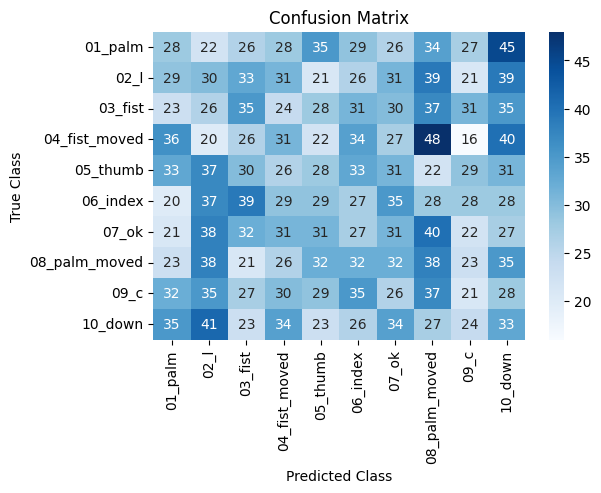

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


               precision    recall  f1-score   support

      01_palm       0.10      0.09      0.10       300
         02_l       0.09      0.10      0.10       300
      03_fist       0.12      0.12      0.12       300
04_fist_moved       0.11      0.10      0.11       300
     05_thumb       0.10      0.09      0.10       300
     06_index       0.09      0.09      0.09       300
        07_ok       0.10      0.10      0.10       300
08_palm_moved       0.11      0.13      0.12       300
         09_c       0.09      0.07      0.08       300
      10_down       0.10      0.11      0.10       300

     accuracy                           0.10      3000
    macro avg       0.10      0.10      0.10      3000
 weighted avg       0.10      0.10      0.10      3000



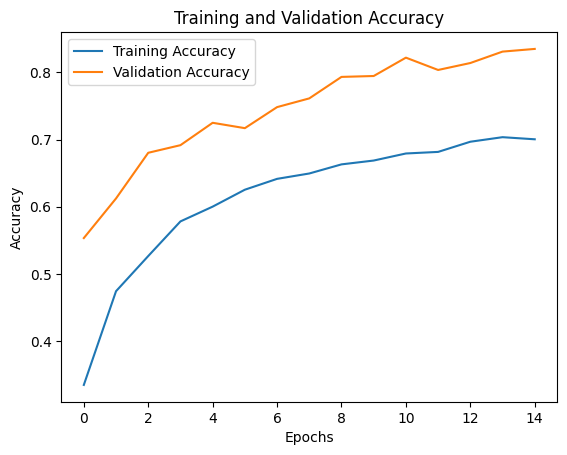

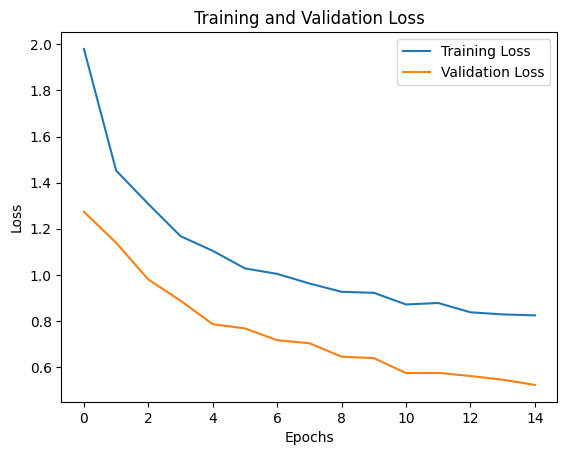

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Predict probabilities and classes
y_pred_probs = model.predict(test_generator)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted class indices
y_true = test_generator.classes  # True labels from the test generator

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step


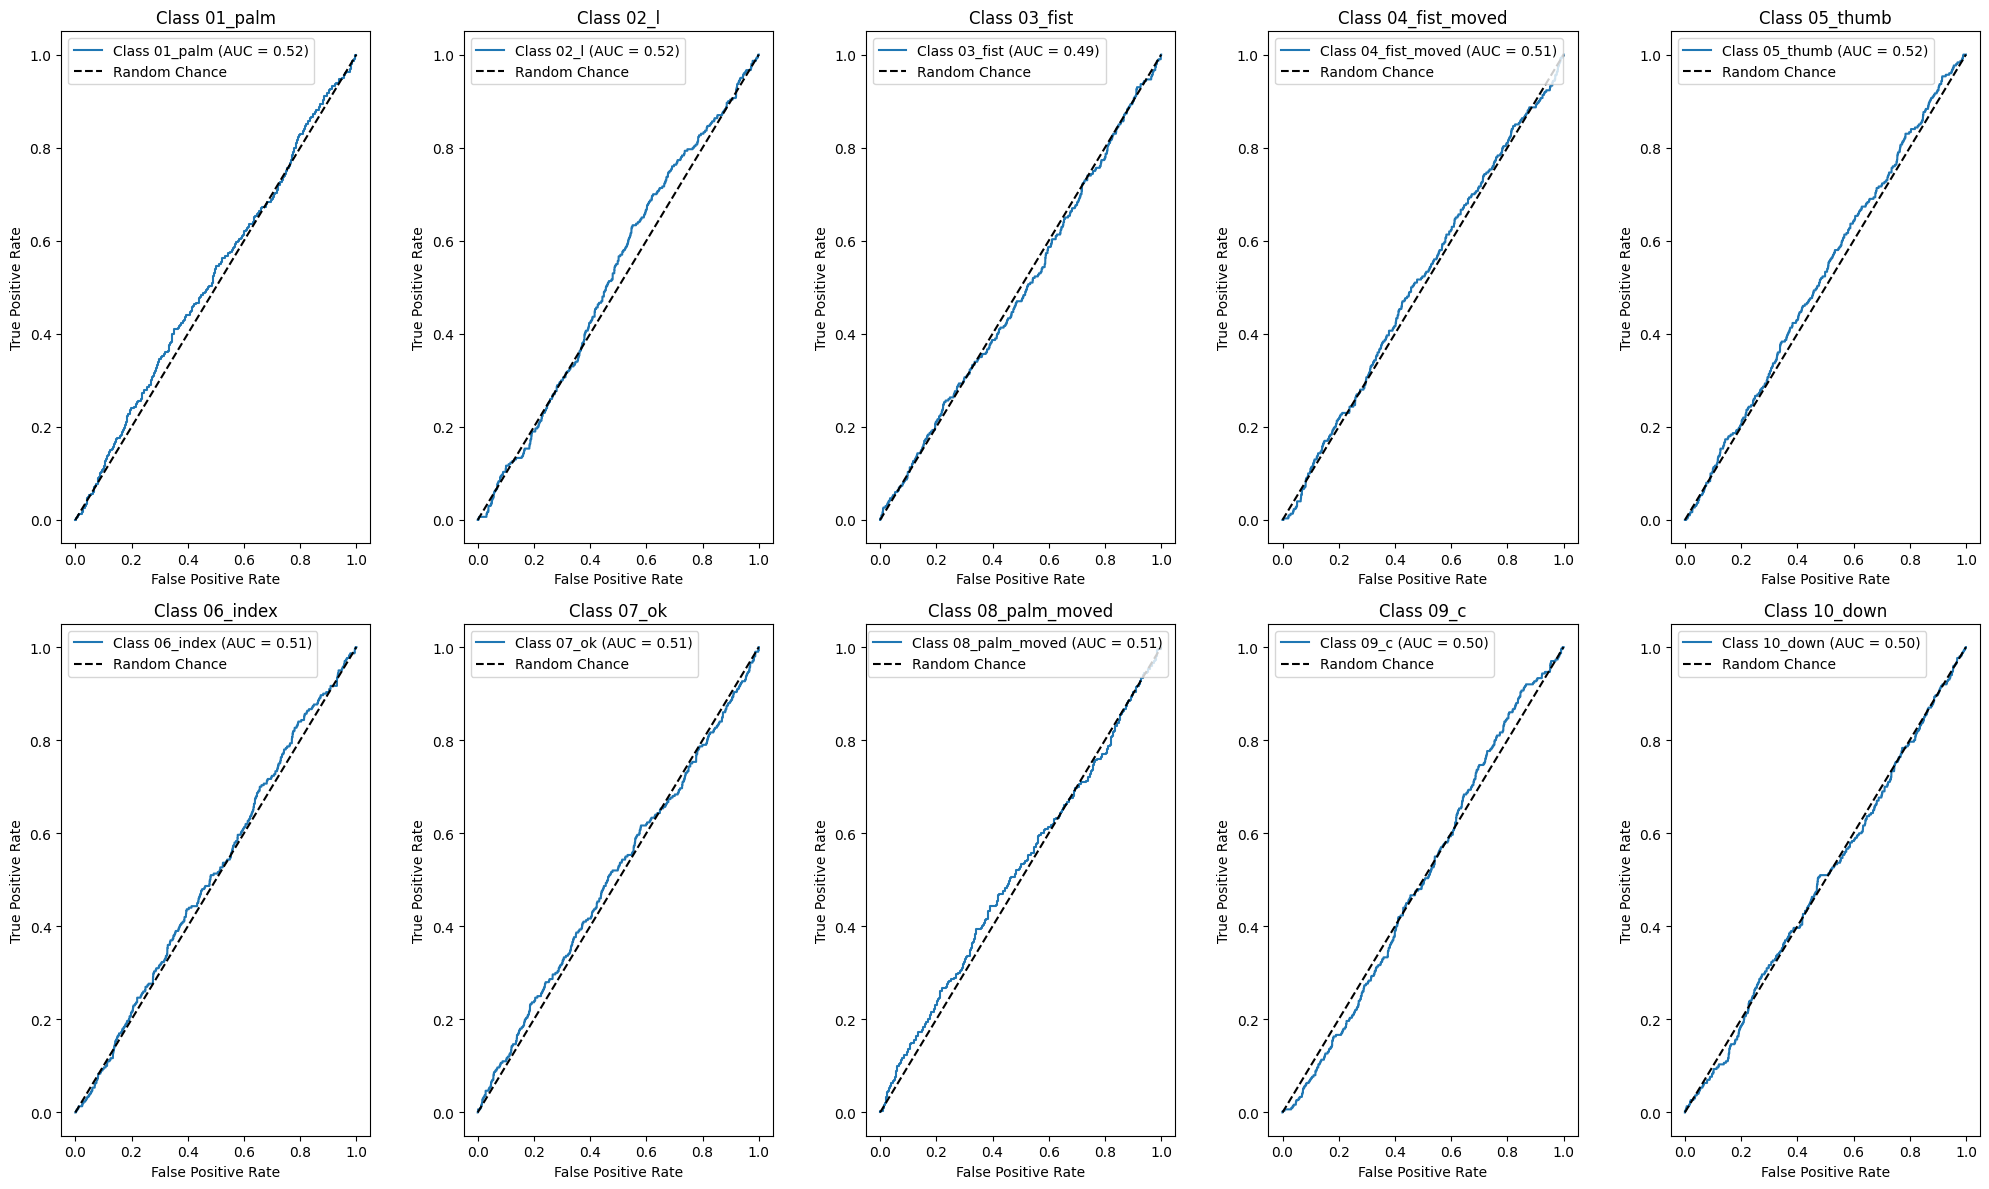

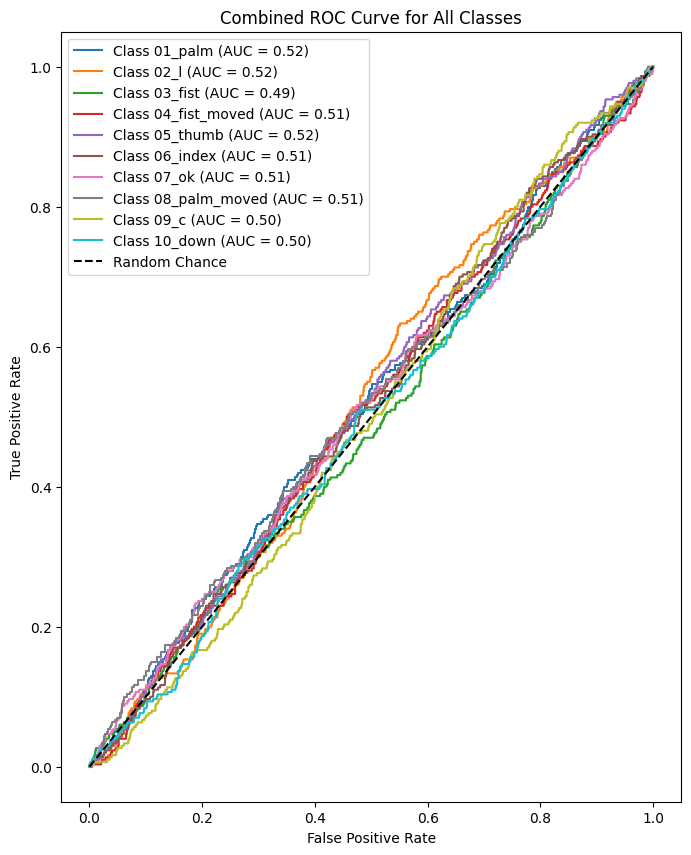

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

n_classes = len(class_labels)
fpr = {}
tpr = {}
roc_auc = {}

# Calculate ROC and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves for each class
fig, axes = plt.subplots(nrows=(n_classes // 5) + (n_classes % 5 > 0), ncols=5, figsize=(20, 4 * (n_classes // 5 + 1)))

# Flatten axes to easily loop over them
axes = axes.flatten()

# Plot each class's ROC curve
for i in range(n_classes):
    axes[i].plot(fpr[i], tpr[i], label=f"Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})")
    axes[i].plot([0, 1], [0, 1], "k--", label="Random Chance")
    axes[i].set_title(f"Class {class_labels[i]}")
    axes[i].set_xlabel("False Positive Rate")
    axes[i].set_ylabel("True Positive Rate")
    axes[i].legend(loc="best")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Plot the combined ROC Curve for all classes
plt.figure(figsize=(8, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.title("Combined ROC Curve for All Classes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()


# Densenet

In [ ]:
val_datagen = ImageDataGenerator()

# Create validation generator
val_generator = val_datagen.flow_from_directory(
    '/content/dataset_densenet/val',  # Path to validation dataset
    target_size=(224, 224),  # Keep the size as 224x224
    batch_size=32,           # You can adjust the batch size if needed
    class_mode='categorical'  # For multi-class classification
)

Found 3000 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet121

# Load the DenseNet-121 model with pretrained ImageNet weights
densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras import layers, models

# Add custom classification head
model = models.Sequential([
    densenet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history_densenet=model.fit(train_generator_densenet,
                           validation_data=val_generator,
                           epochs=15,
                           callbacks=[early_stopping])

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 519s 789ms/step - accuracy: 0.3949 - loss: 1.7478 - val_accuracy: 0.5183 - val_loss: 4.7019
Epoch 2/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 230s 518ms/step - accuracy: 0.8498 - loss: 0.5123 - val_accuracy: 0.7927 - val_loss: 1.1072
Epoch 3/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 259s 514ms/step - accuracy: 0.9157 - loss: 0.3076 - val_accuracy: 0.2907 - val_loss: 8.4460
Epoch 4/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 259s 509ms/step - accuracy: 0.9378 - loss: 0.2292 - val_accuracy: 0.7950 - val_loss: 0.8950
Epoch 5/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 227s 510ms/step - accuracy: 0.9442 - loss: 0.2258 - val_accuracy: 0.9130 - val_loss: 0.7398
Epoch 6/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 226s 507ms/step - accuracy: 0.9514 - loss: 0.1943 - val_accuracy: 0.9900 - val_loss: 0.0633
Epoch 7/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 264s 514ms/step - accuracy: 0.9526 - loss: 0.1649 - val_accuracy: 0.9473 - val_loss: 0.2364
Epoch 8/15
438/438 ━━━━━━━━━━━━━━━━━━━━ 260s 510ms/step - accuracy: 0.9605 - loss: 0.16

# Densenet Evaluation

In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8757 - loss: 0.4986
Validation Loss: 0.4467
Validation Accuracy: 88.23%


In [ ]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    '/content/dataset_densenet/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 3000 images belonging to 10 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 150ms/step - accuracy: 0.8833 - loss: 0.4436
Test Loss: 0.4418
Test Accuracy: 88.57%


In [ ]:
# Get predictions
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_classes = predictions.argmax(axis=-1)

# True labels
true_classes = test_generator.classes

# Class indices
class_labels = list(test_generator.class_indices.keys())

94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step


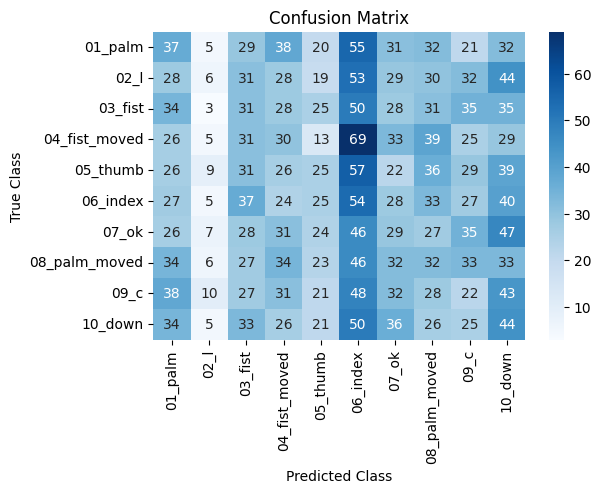

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


               precision    recall  f1-score   support

      01_palm       0.12      0.12      0.12       300
         02_l       0.10      0.02      0.03       300
      03_fist       0.10      0.10      0.10       300
04_fist_moved       0.10      0.10      0.10       300
     05_thumb       0.12      0.08      0.10       300
     06_index       0.10      0.18      0.13       300
        07_ok       0.10      0.10      0.10       300
08_palm_moved       0.10      0.11      0.10       300
         09_c       0.08      0.07      0.08       300
      10_down       0.11      0.15      0.13       300

     accuracy                           0.10      3000
    macro avg       0.10      0.10      0.10      3000
 weighted avg       0.10      0.10      0.10      3000



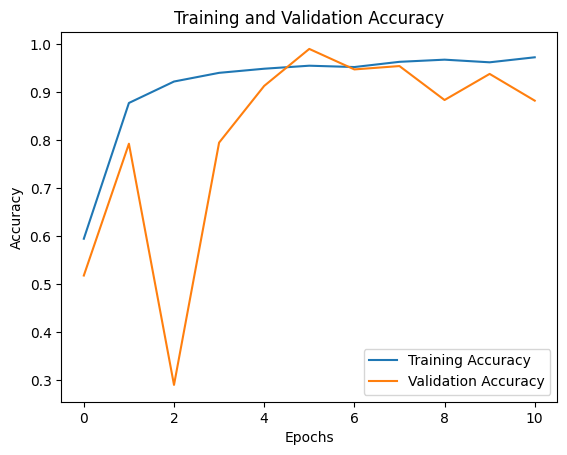

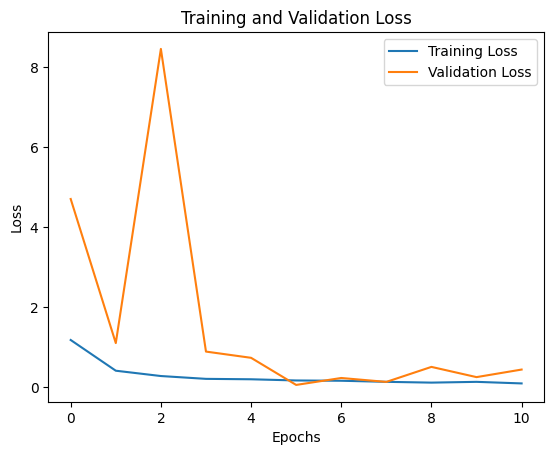

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_densenet.history['accuracy'], label='Training Accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history_densenet.history['loss'], label='Training Loss')
plt.plot(history_densenet.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Predict probabilities and classes
y_pred_probs = model.predict(test_generator)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted class indices
y_true = test_generator.classes  # True labels from the test generator

94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step


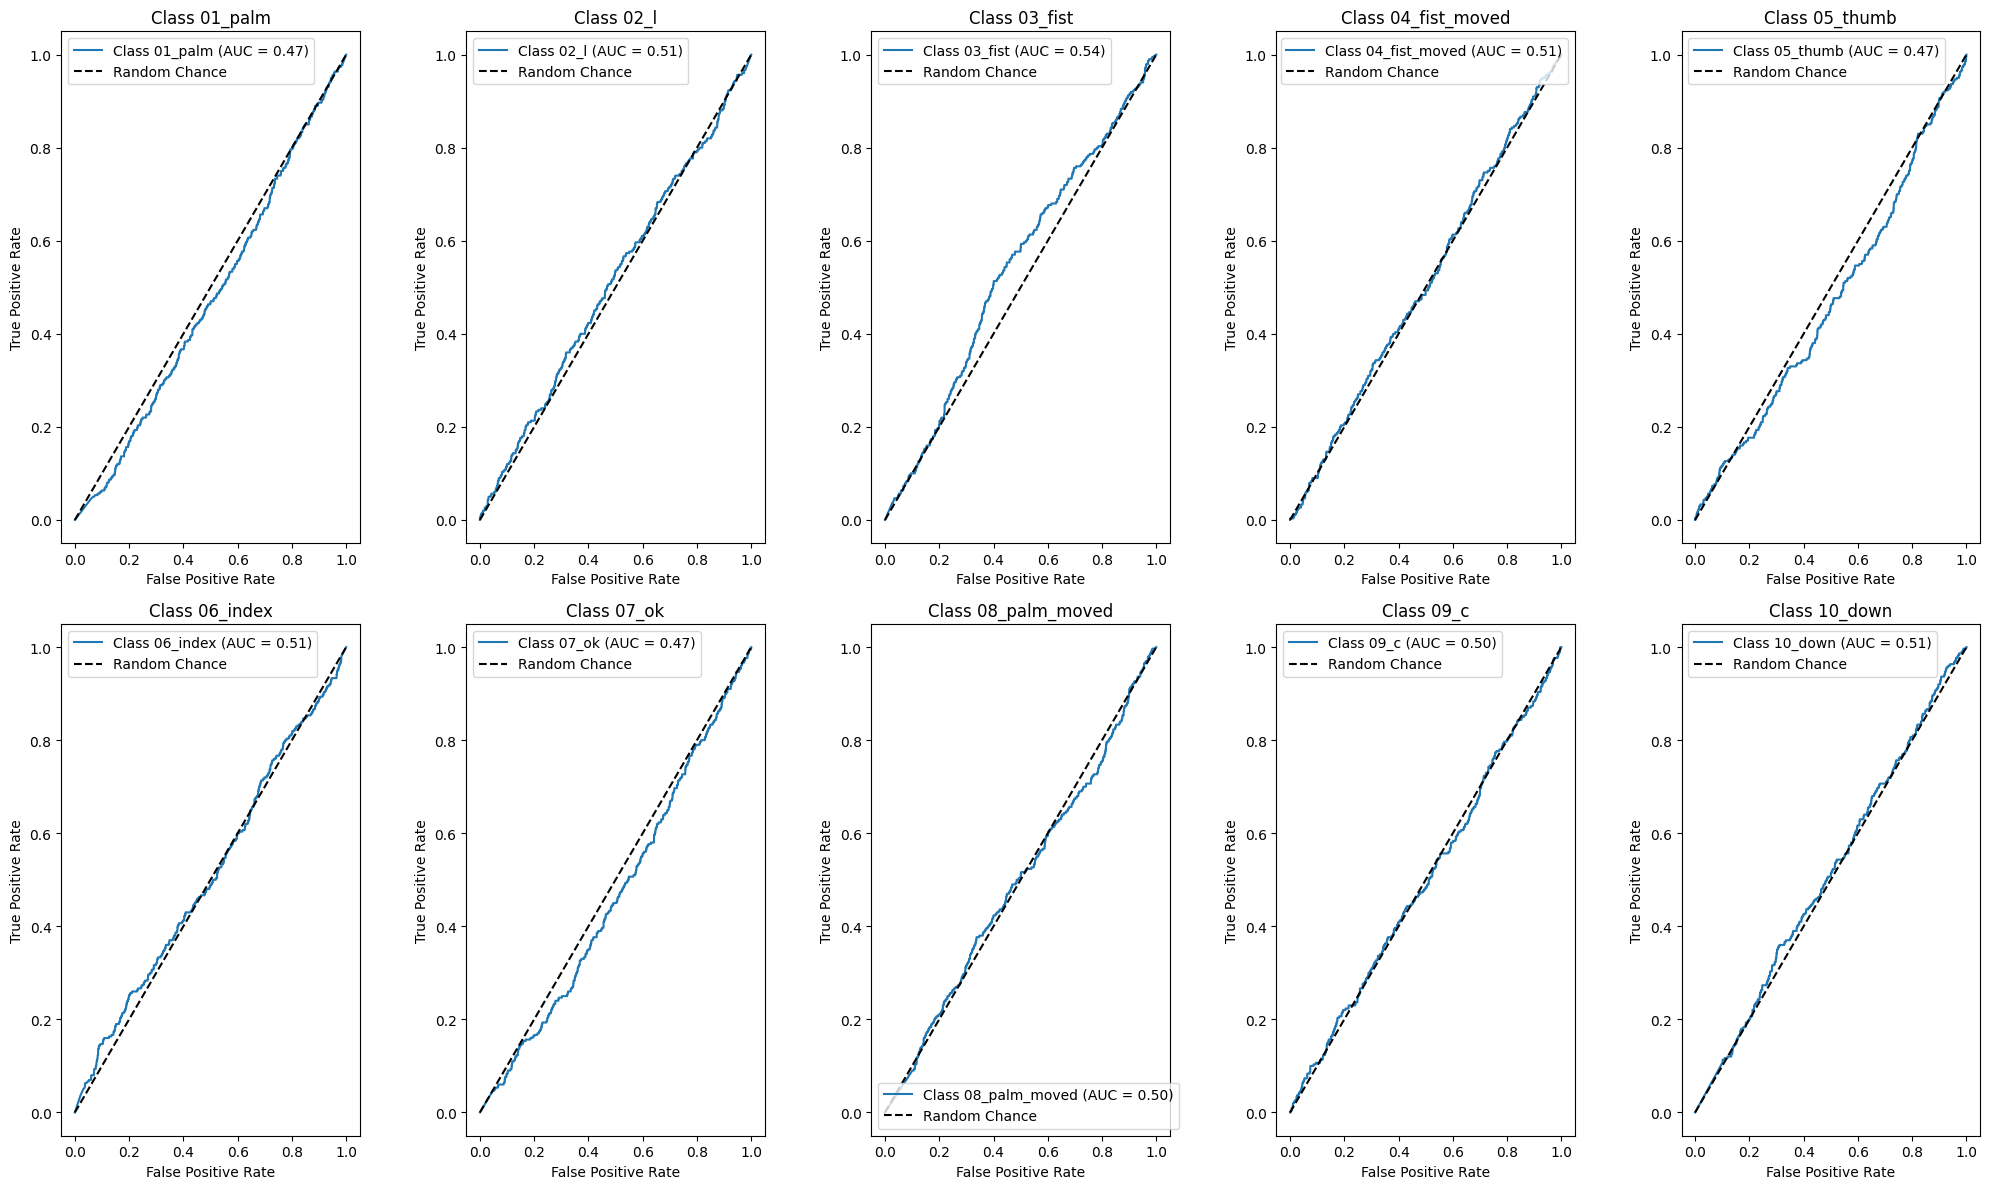

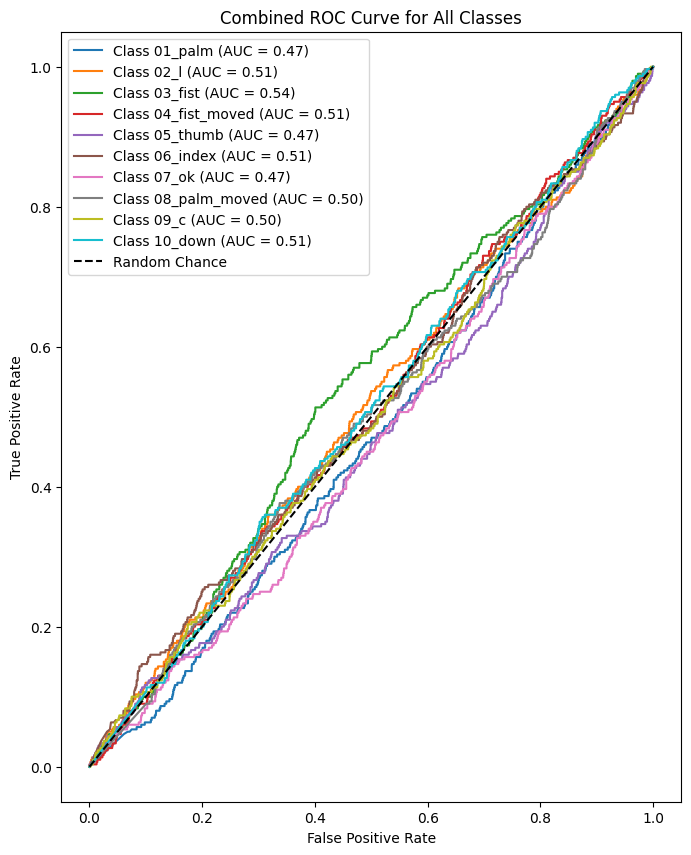

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

n_classes = len(class_labels)
fpr = {}
tpr = {}
roc_auc = {}

# Calculate ROC and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves for each class
fig, axes = plt.subplots(nrows=(n_classes // 5) + (n_classes % 5 > 0), ncols=5, figsize=(20, 4 * (n_classes // 5 + 1)))

# Flatten axes to easily loop over them
axes = axes.flatten()

# Plot each class's ROC curve
for i in range(n_classes):
    axes[i].plot(fpr[i], tpr[i], label=f"Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})")
    axes[i].plot([0, 1], [0, 1], "k--", label="Random Chance")
    axes[i].set_title(f"Class {class_labels[i]}")
    axes[i].set_xlabel("False Positive Rate")
    axes[i].set_ylabel("True Positive Rate")
    axes[i].legend(loc="best")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Plot the combined ROC Curve for all classes
plt.figure(figsize=(8, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.title("Combined ROC Curve for All Classes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()


# Comparing

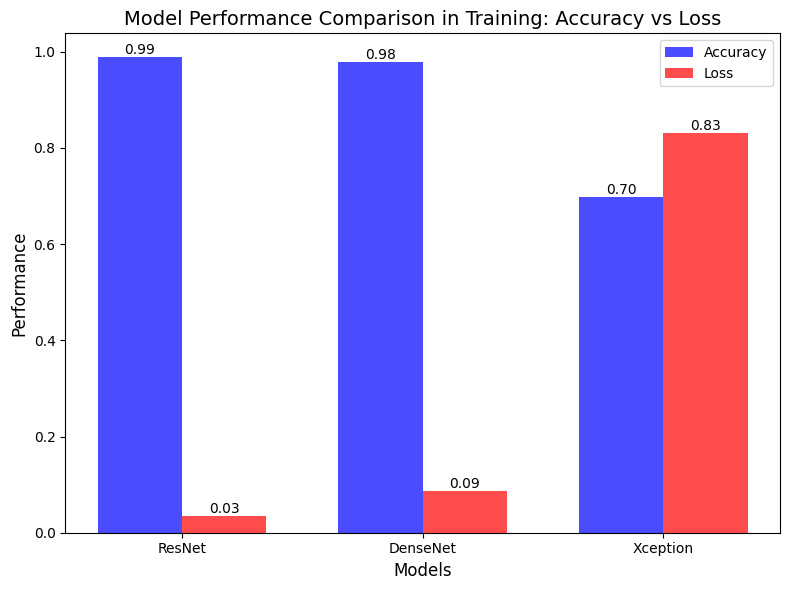

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['ResNet', 'DenseNet', 'Xception']

accuracies = [0.9888, 0.9781, 0.6988]  # Accuracy values for each model
losses = [0.0341,0.086, 0.831]      # Loss values for each model

# Set up the plot
plt.figure(figsize=(8, 6))

# Set the width of each bar and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the bars
plt.bar(index, accuracies, bar_width, label='Accuracy', color='blue', alpha=0.7)
plt.bar(index + bar_width, losses, bar_width, label='Loss', color='red', alpha=0.7)

# Customize the plot
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance', fontsize=12)
plt.title('Model Performance Comparison in Training: Accuracy vs Loss', fontsize=14)
plt.xticks(index + bar_width/2, models)
plt.legend()

# Add value labels on top of each bar
for i, (acc, loss) in enumerate(zip(accuracies, losses)):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, loss, f'{loss:.2f}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

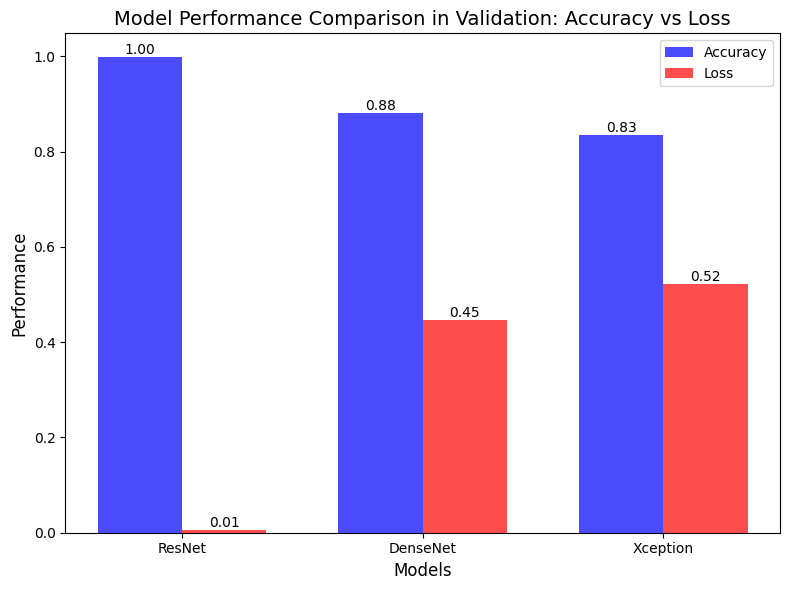

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['ResNet', 'DenseNet', 'Xception']

accuracies = [0.9987, 0.8823, 0.8350]  # Accuracy values for each model
losses = [0.0054,  0.4467, 0.5229]      # Loss values for each model

# Set up the plot
plt.figure(figsize=(8, 6))

# Set the width of each bar and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the bars
plt.bar(index, accuracies, bar_width, label='Accuracy', color='blue', alpha=0.7)
plt.bar(index + bar_width, losses, bar_width, label='Loss', color='red', alpha=0.7)

# Customize the plot
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance', fontsize=12)
plt.title('Model Performance Comparison in Validation: Accuracy vs Loss', fontsize=14)
plt.xticks(index + bar_width/2, models)
plt.legend()

# Add value labels on top of each bar
for i, (acc, loss) in enumerate(zip(accuracies, losses)):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, loss, f'{loss:.2f}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

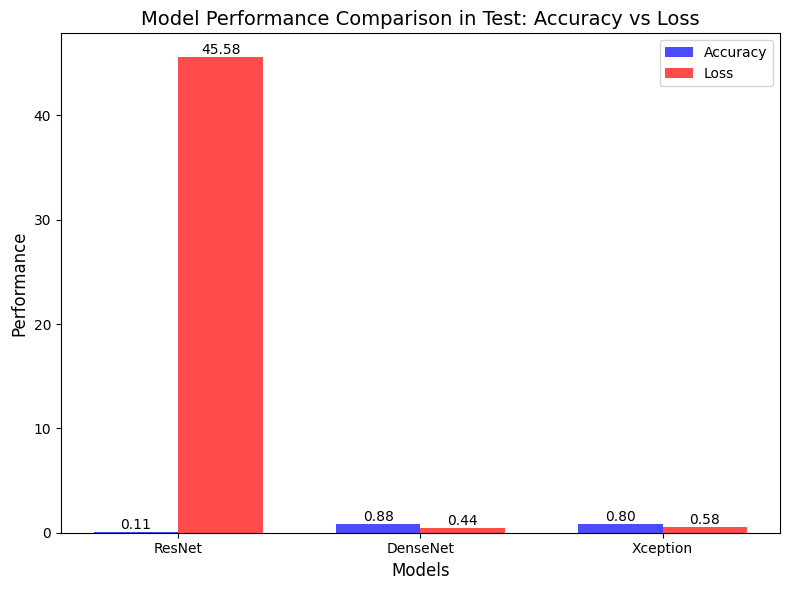

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['ResNet', 'DenseNet', 'Xception']

accuracies = [0.1093, 0.8833, 0.7963]  # Accuracy values for each model
losses = [45.5769, 0.4436, 0.5780]      # Loss values for each model

# Set up the plot
plt.figure(figsize=(8, 6))

# Set the width of each bar and positions
bar_width = 0.35
index = np.arange(len(models))

# Create the bars
plt.bar(index, accuracies, bar_width, label='Accuracy', color='blue', alpha=0.7)
plt.bar(index + bar_width, losses, bar_width, label='Loss', color='red', alpha=0.7)

# Customize the plot
plt.xlabel('Models', fontsize=12)
plt.ylabel('Performance', fontsize=12)
plt.title('Model Performance Comparison in Test: Accuracy vs Loss', fontsize=14)
plt.xticks(index + bar_width/2, models)
plt.legend()

# Add value labels on top of each bar
for i, (acc, loss) in enumerate(zip(accuracies, losses)):
    plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')
    plt.text(i + bar_width, loss, f'{loss:.2f}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()